In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [4]:
dataset=pd.read_csv("social network ads.csv")

In [5]:
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


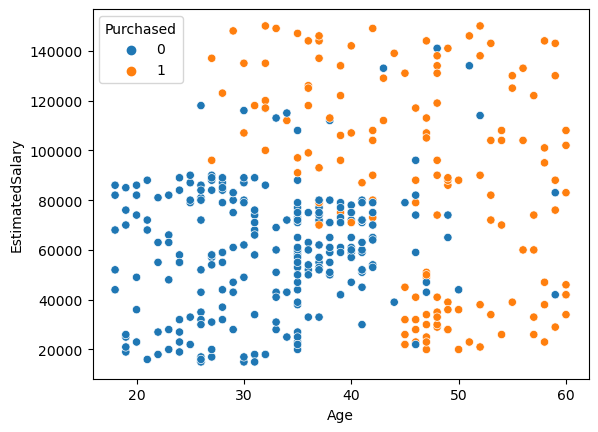

In [28]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [6]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x= dataset.iloc[:,:-1]
y= dataset["Purchased"]

In [8]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc= StandardScaler()
sc.fit(x)
x= pd.DataFrame(sc.transform(x),columns=x.columns)

In [12]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
dt.score(x_test,y_test)*100

83.75

In [27]:
dt1.score(x_test,y_test)*100

83.75

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


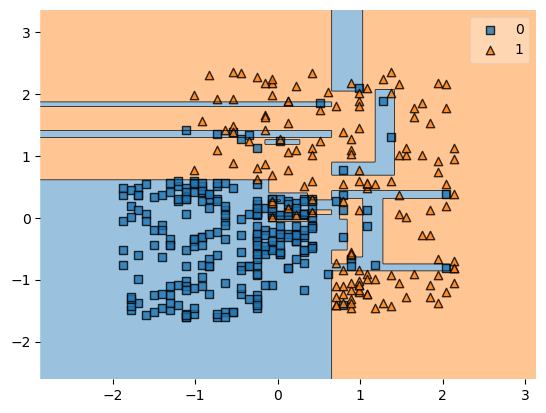

In [33]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

In [19]:
dt.predict([[35,20000]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [20]:
from sklearn.tree import plot_tree

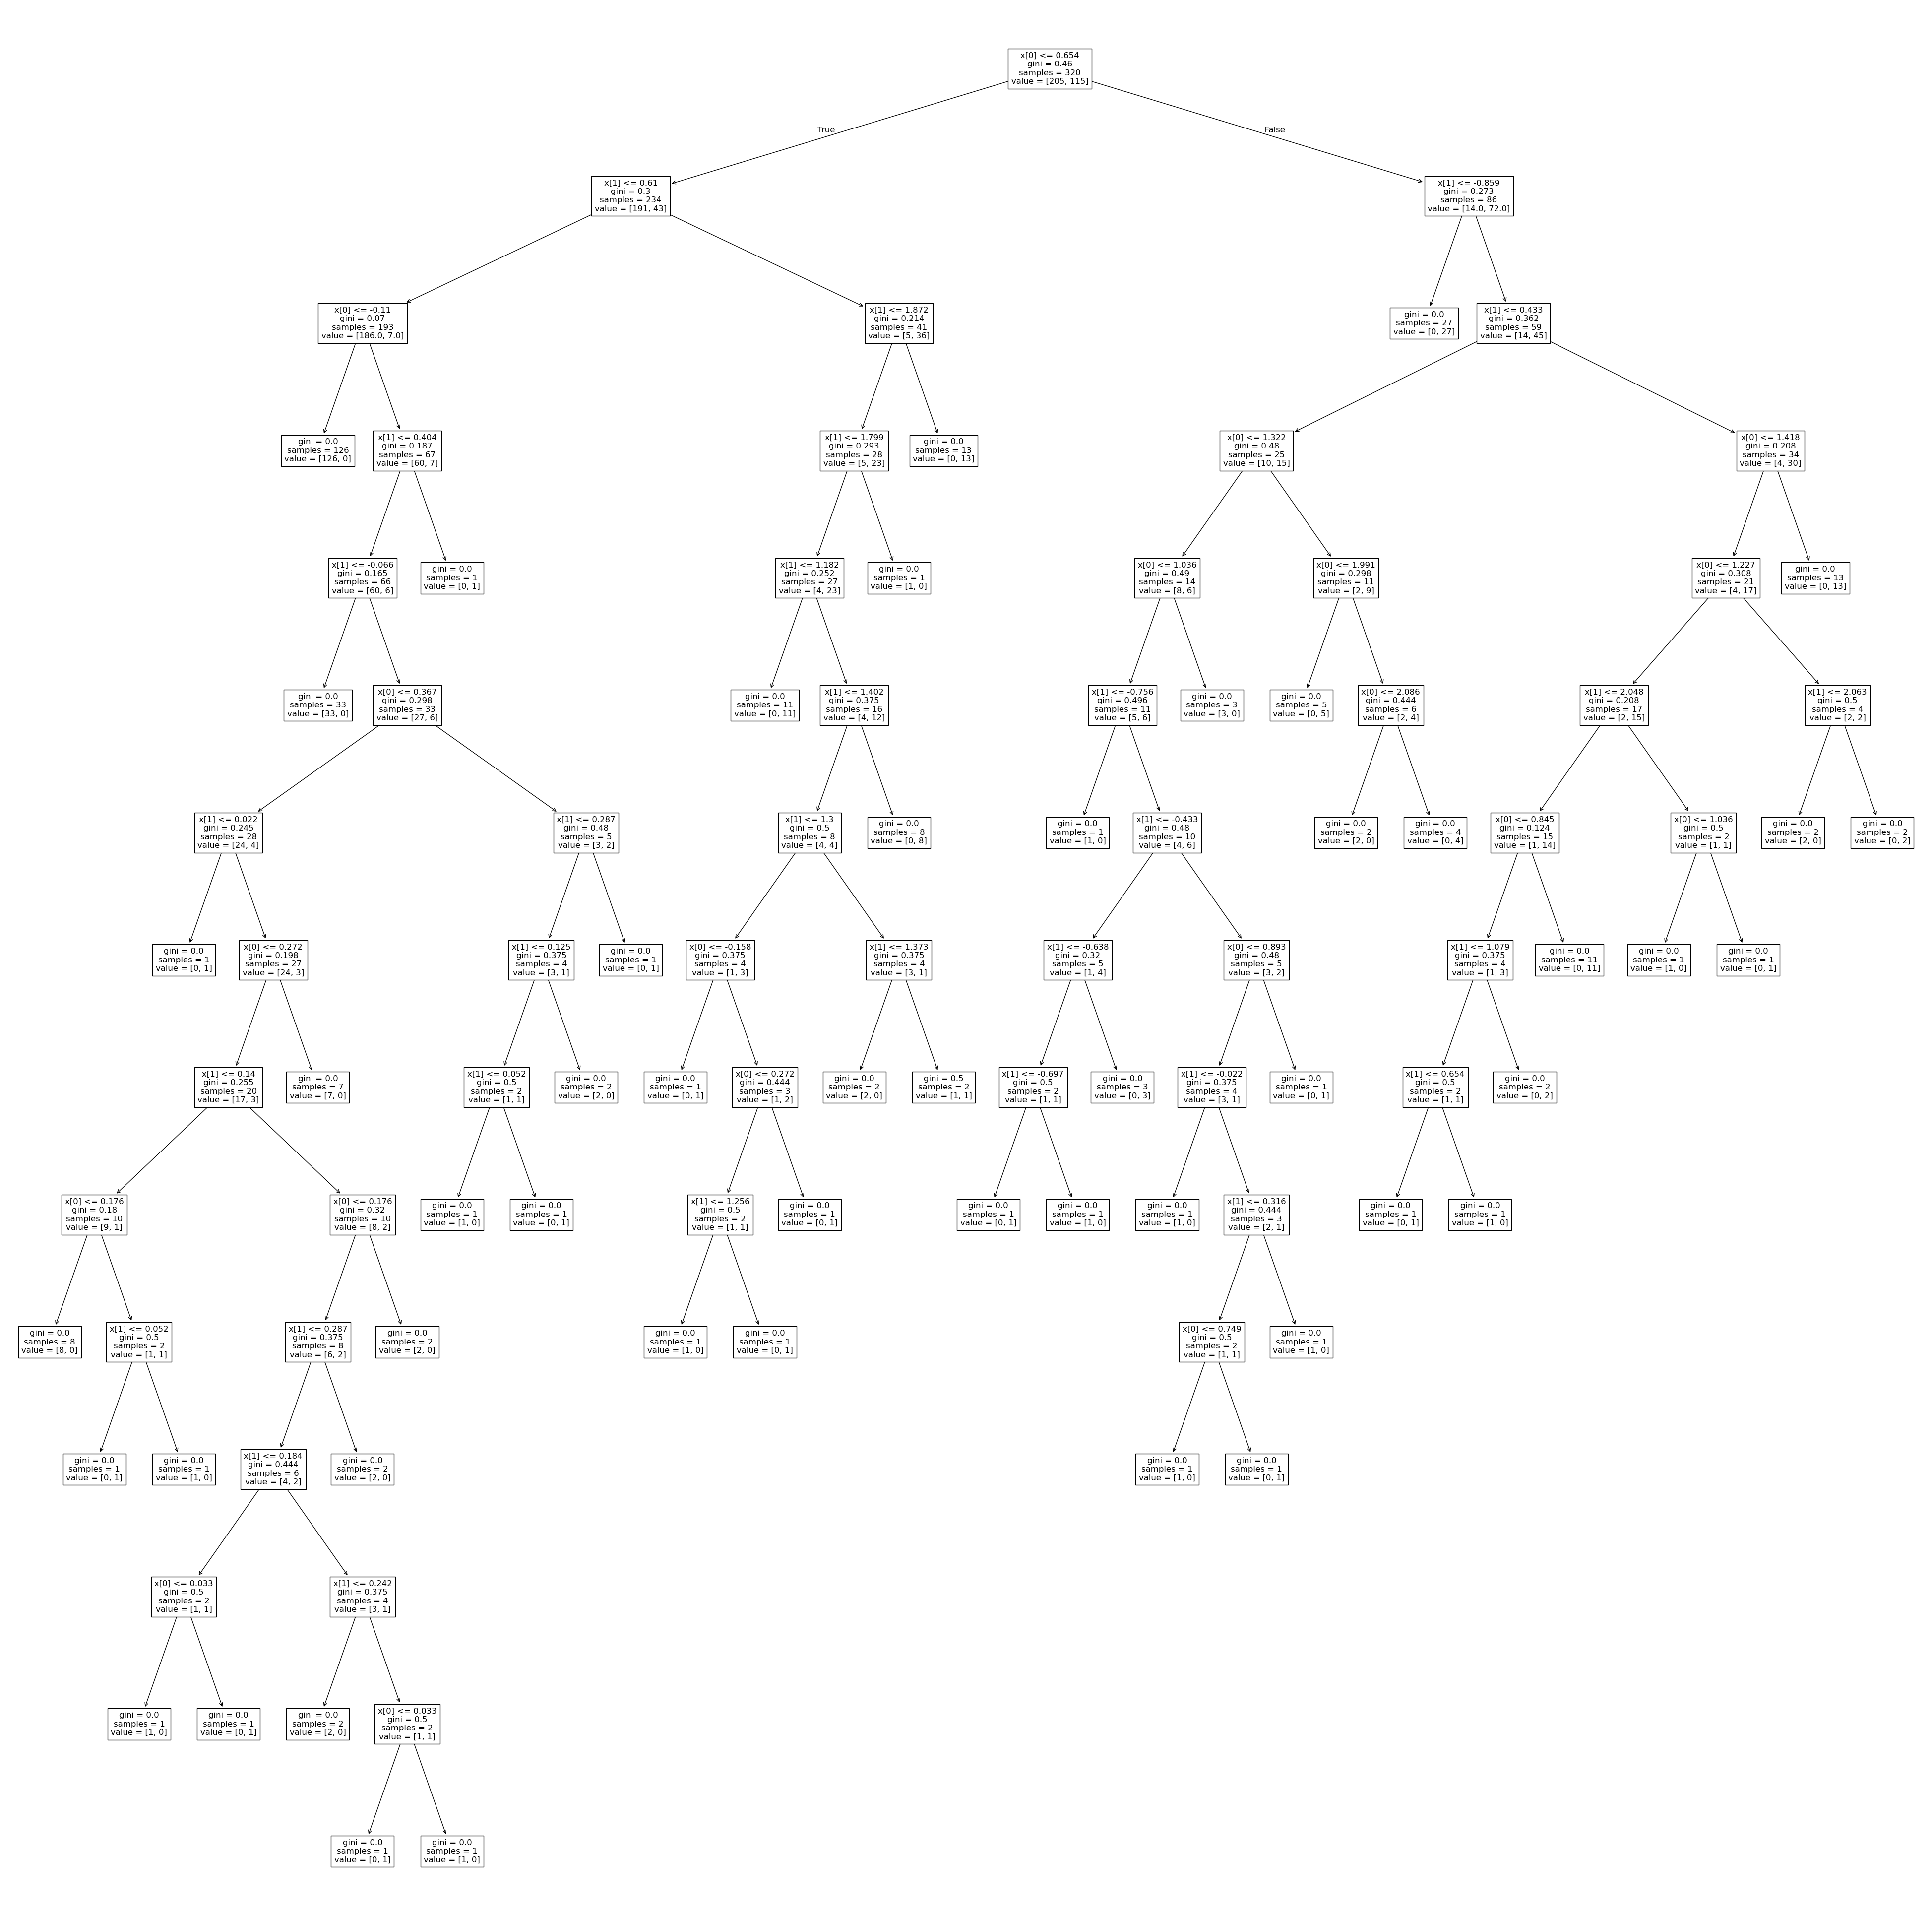

In [23]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()


# pre pruning

# pruning 

In [34]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [35]:
dt.score(x_test,y_test)*100

90.0

In [37]:
dt.score(x_train,y_train)*100

93.4375

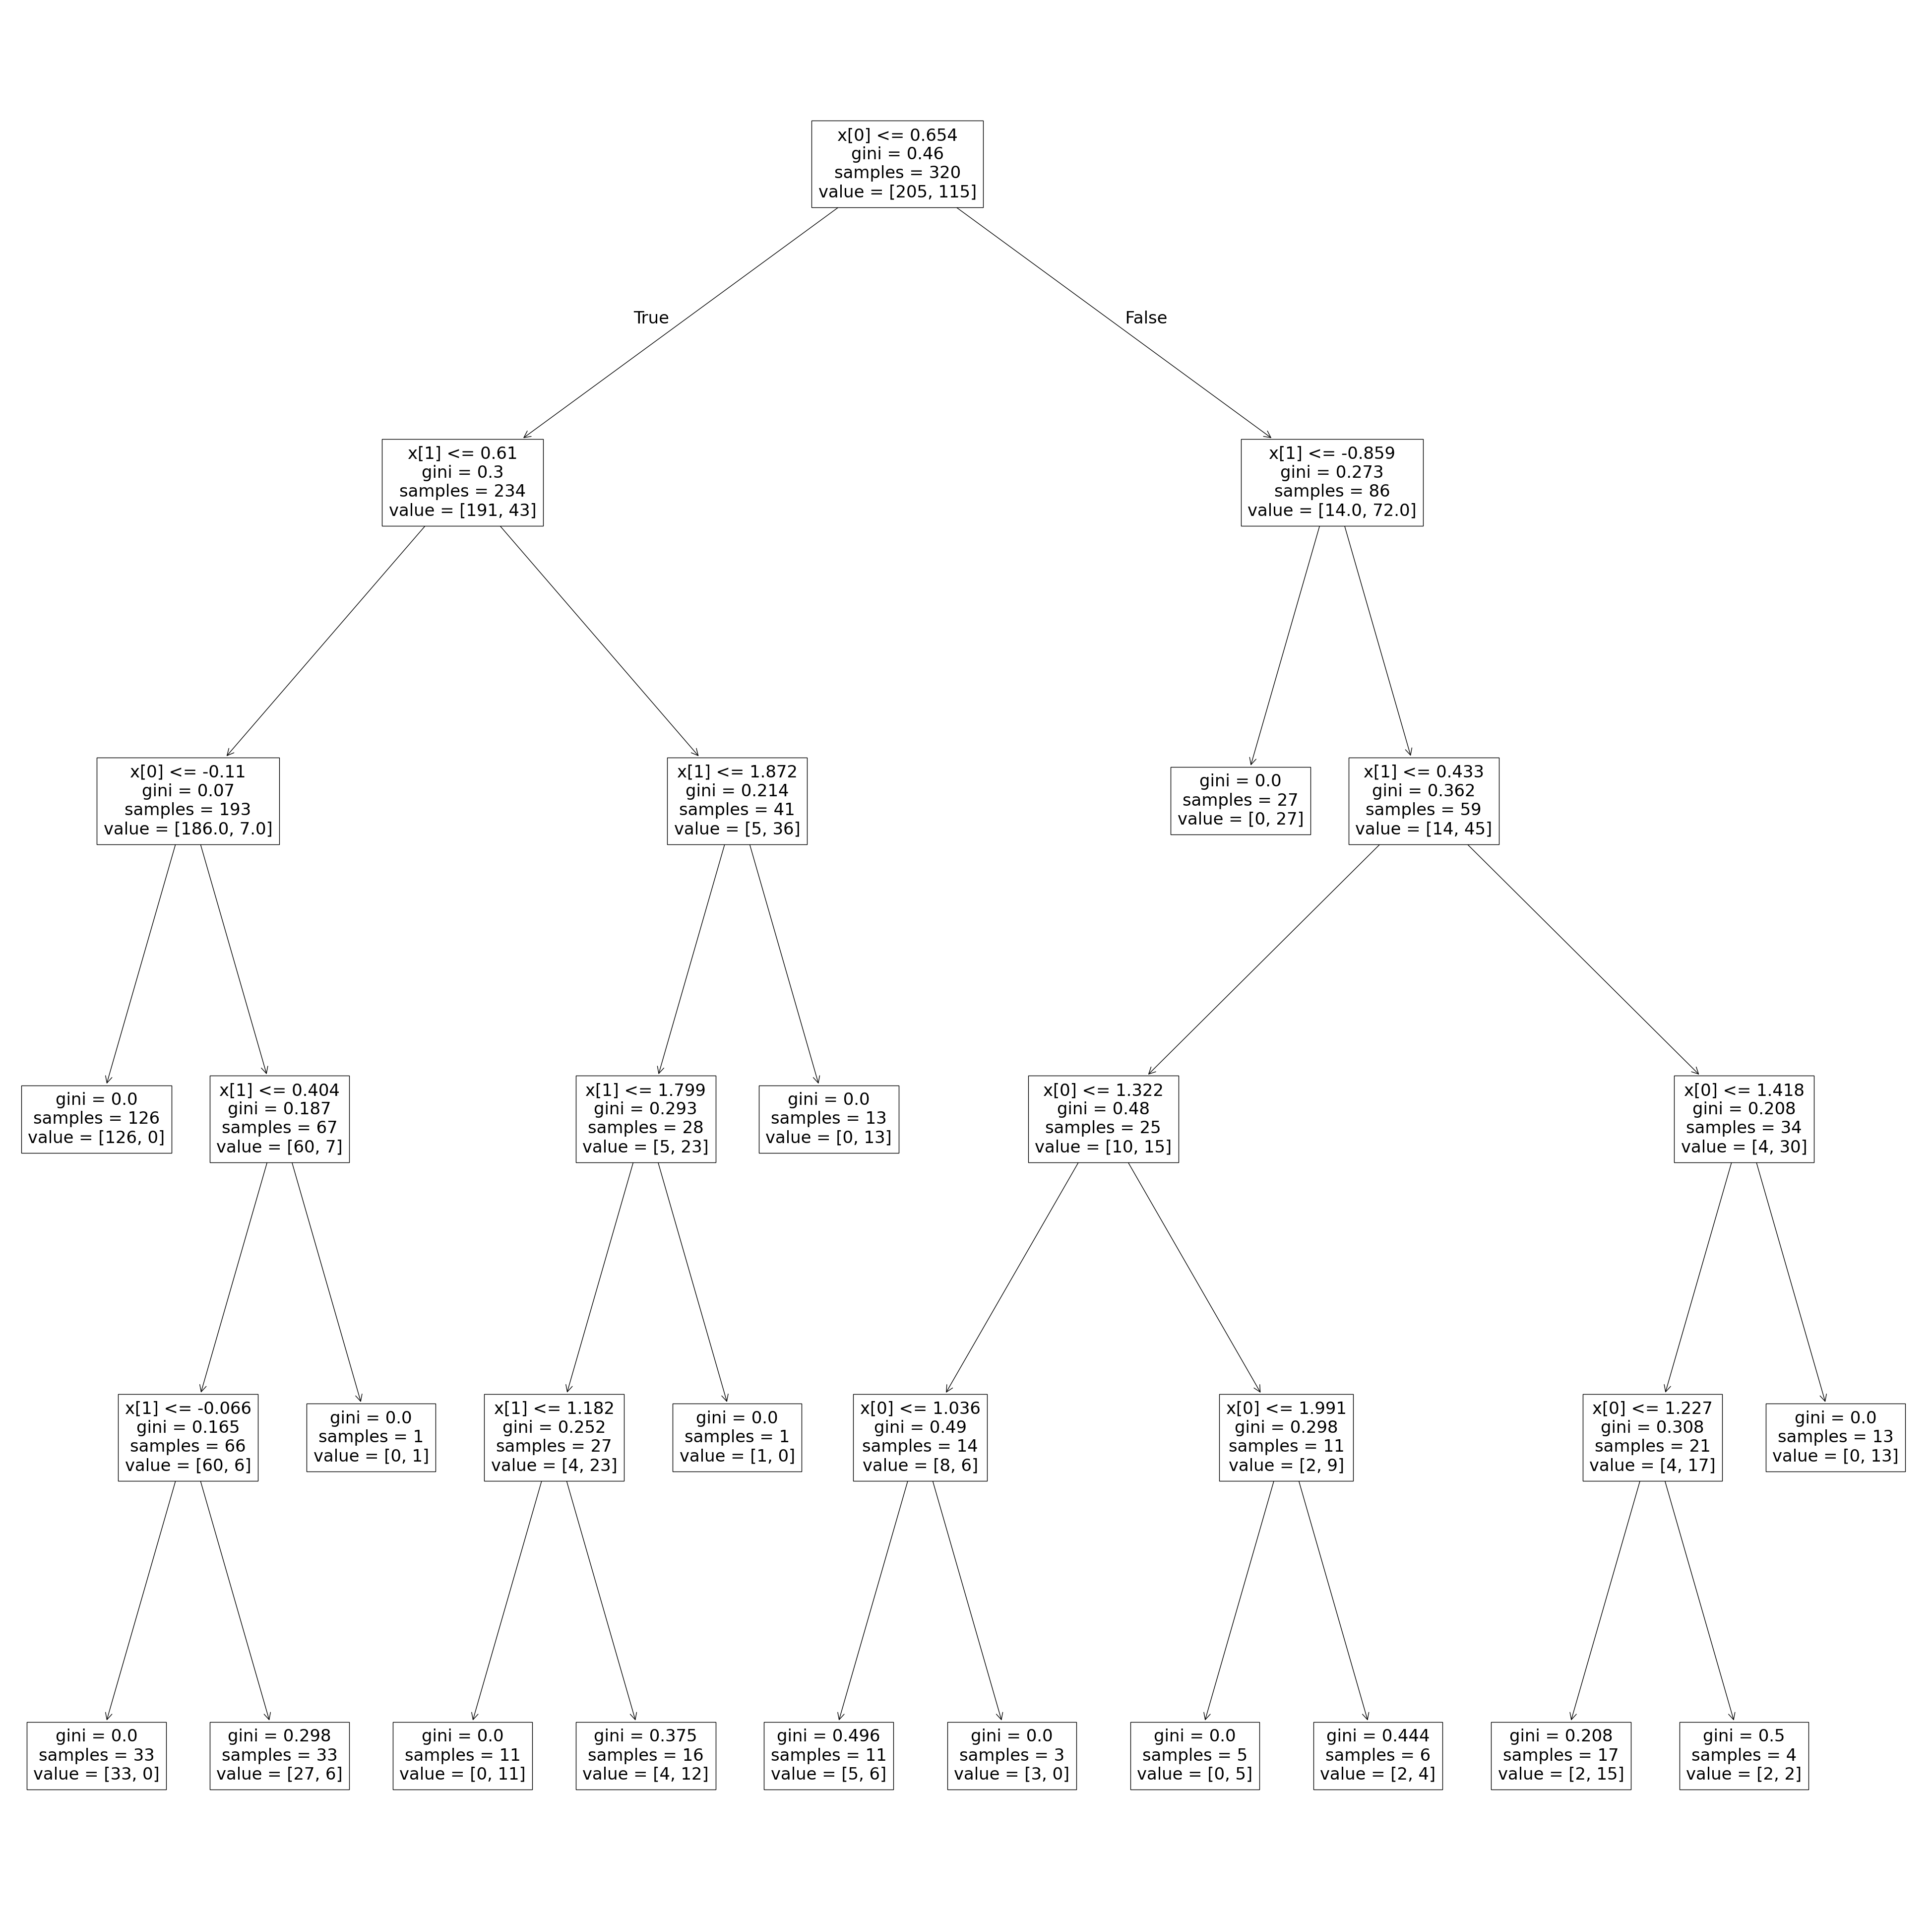

In [38]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


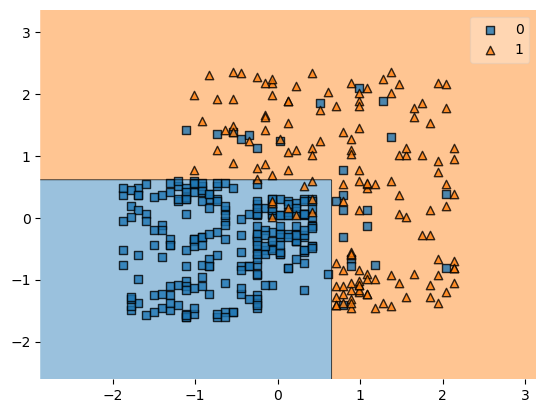

In [49]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

# Post puring

In [42]:
for i in range (1,20):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.975 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.990625 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [44]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
dt.score(x_test,y_test)*100

91.25

In [46]:
dt.score(x_train,y_train)*100

91.875

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


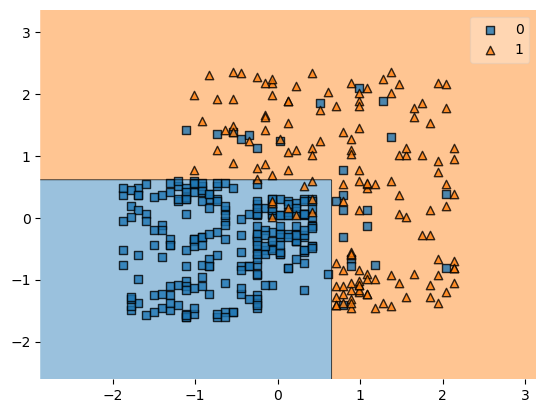

In [48]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

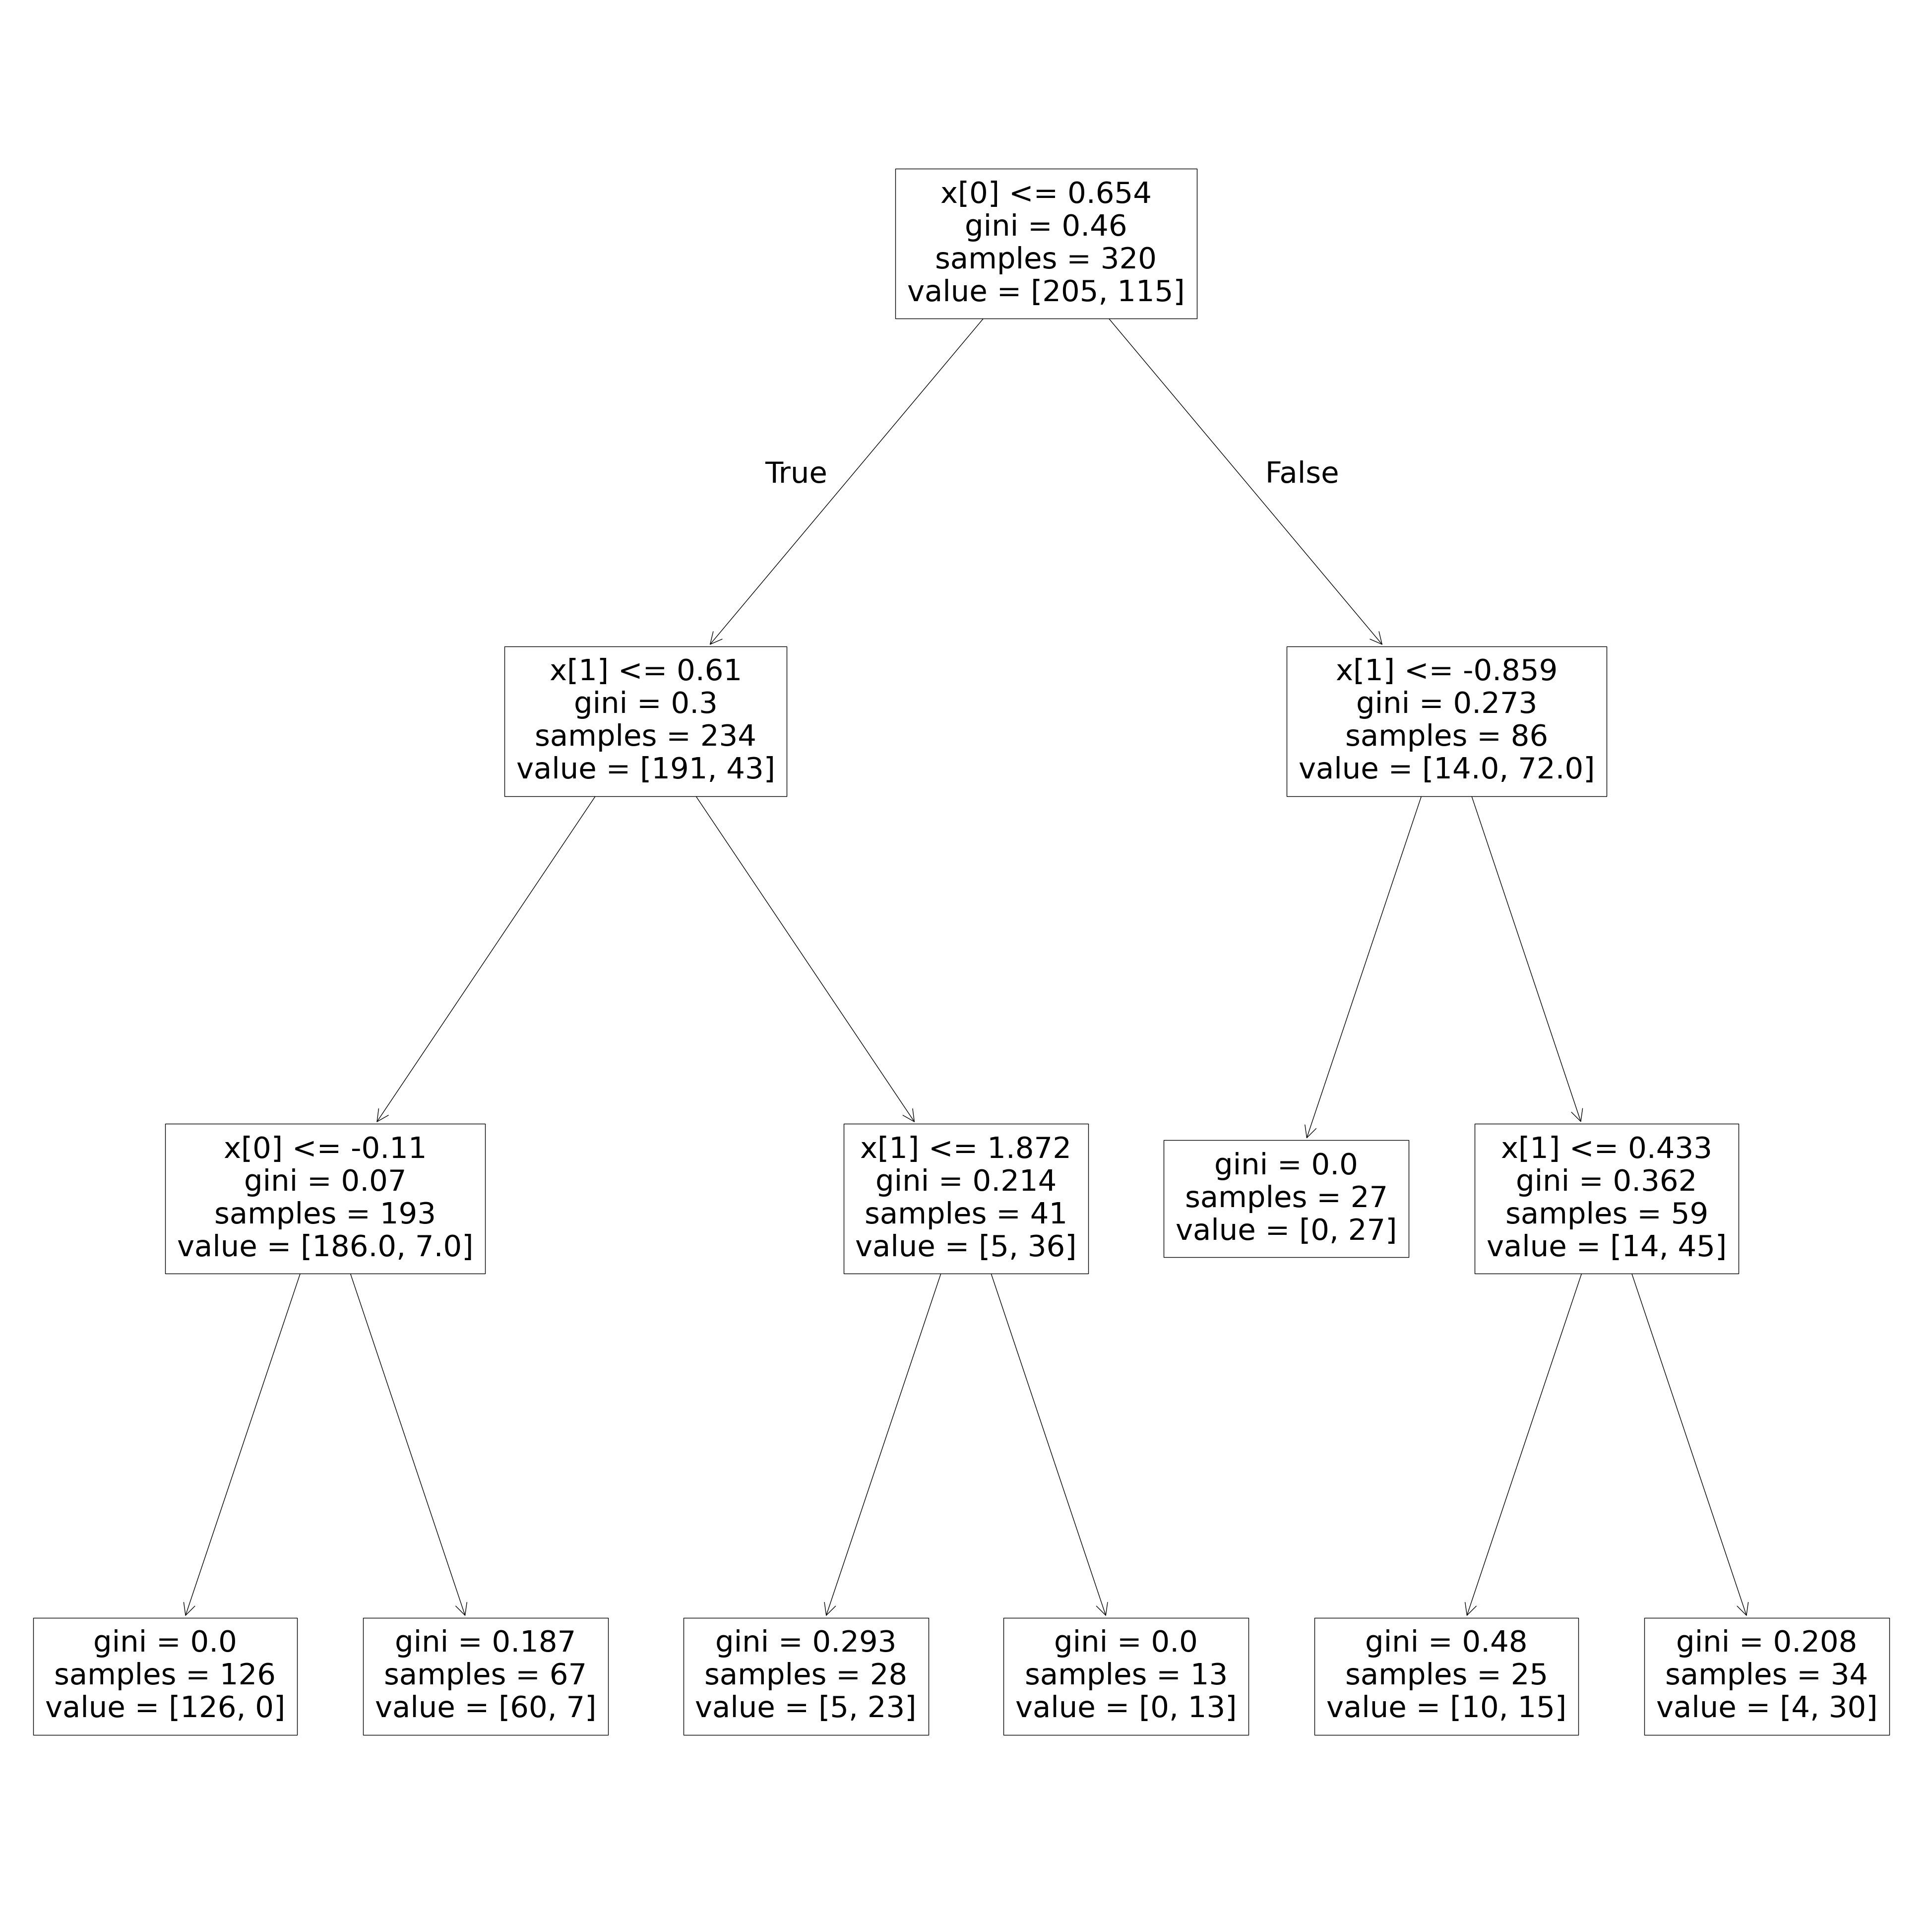

In [50]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()
